## 1.Импорт библиотек и настройка графиков:
### Импортируются необходимые библиотеки: numpy, MLPClassifier из sklearn.neural_network, make_classification из sklearn.datasets, matplotlib.pyplot, seaborn.
### Устанавливается стиль графиков и включается отображение графиков в ноутбуке.

In [1]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
%matplotlib inline

## 2. Генерация данных и обучение модели:
### make_classification создает случайные данные для классификации с указанными параметрами.
### MLPClassifier обучается на первых 100 примерах данных.

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, weights=[.5, .5], random_state=17)
clf = MLPClassifier(max_iter=600, random_state=123).fit(X[:100], y[:100])

## 3. Построение графика решающей границы для исходной модели:
### Создается график, на котором показывается решающая граница модели на исходных данных.

In [3]:
xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

[None, (-3.0, 3.0), (-3.0, 3.0)]

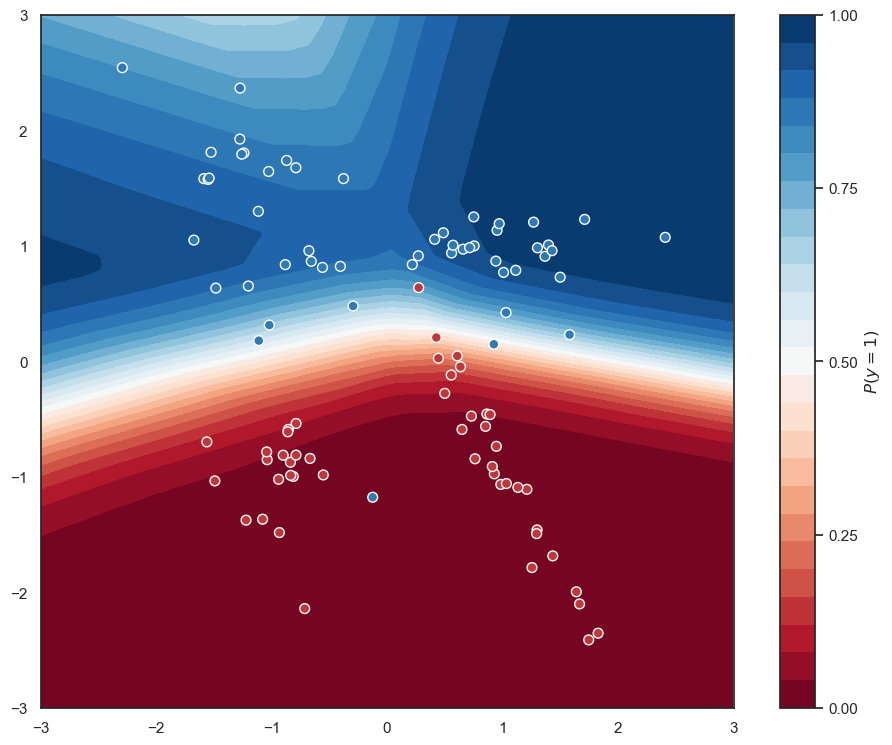

In [4]:
# Создание нового графика размером 12x9 дюймов
f, ax = plt.subplots(figsize=(12, 9))

# Создание контурного графика с заданными данными и параметрами
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

# Добавление цветовой шкалы к графику с подписью
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")

# Установка делений на цветовой шкале
ax_c.set_ticks([0, .25, .5, .75, 1])

# Добавление диаграммы рассеяния на график
ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)

# Установка равного соотношения сторон и пределов осей x и y
ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))

## 4. Функция plot_decision_boundary:
### Визуализирует решающую границу классификатора на графике рассеяния.
### Если добавлены "данные-мусор" (chaff), они также визуализируются.

In [5]:
def plot_decision_boundary(X_orig, y_orig, probs_orig, chaff_X=None, chaff_y=None, probs_poisoned=None):
    f, ax = plt.subplots(figsize=(12, 9))

    ax.scatter(X_orig[100:,0], X_orig[100:, 1], 
               c=y_orig[100:], s=50, cmap="gray",
               edgecolor="black", linewidth=1)
    
    if all([(chaff_X is not None),
            (chaff_y is not None),
            (probs_poisoned is not None)]):
        ax.scatter(chaff_X[:,0], chaff_X[:, 1], 
                   c=chaff_y, s=50, cmap="gray", 
                   marker="*", edgecolor="black", linewidth=1)
        ax.contour(xx, yy, probs_orig, levels=[.5], 
                   cmap="gray", vmin=0, vmax=.8)
        ax.contour(xx, yy, probs_poisoned, levels=[.5], 
                   cmap="gray")
    else:
        ax.contour(xx, yy, probs_orig, levels=[.5], cmap="gray")

    ax.set(aspect="equal", xlim=(-3, 3), ylim=(-3, 3))

## Исходная граница решения классификатора MLP, установленная в наборе данных

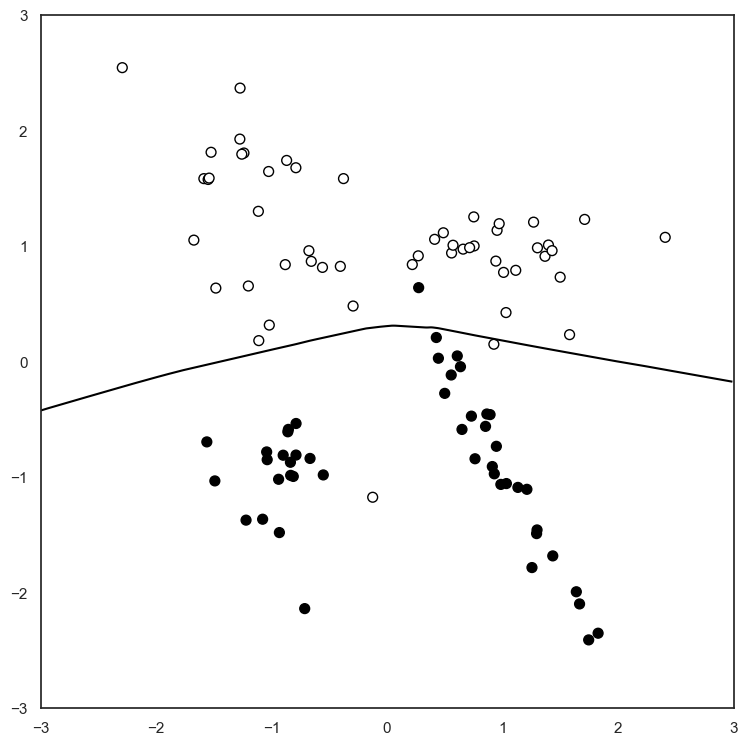

In [6]:
plot_decision_boundary(X, y, probs)

## 5. Внедрение данных-мусора и переобучение модели:
### Внедряется 5% данных-мусора в виде точек, которые явно не принадлежат ни одному из классов.
### Модель обучается дополнительно на этих данных-мусорах с помощью partial_fit.
### Визуализируется решающая граница после внедрения данных-мусора.

In [7]:
num_chaff = 5
chaff_X = np.array([np.linspace(-2, -1, num_chaff), np.linspace(0.1, 0.1, num_chaff)]).T
chaff_y = np.ones(num_chaff)

## После 1-й частичной примерки

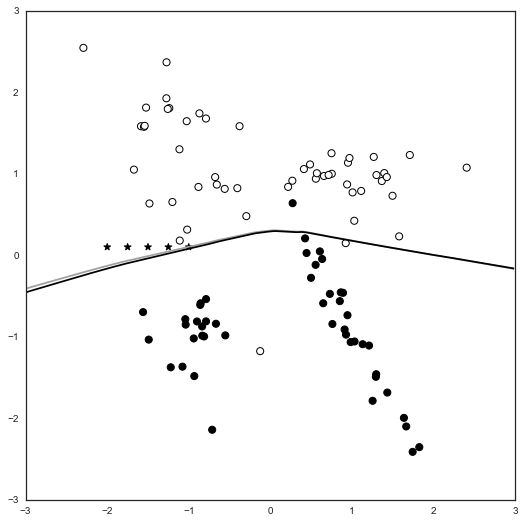

In [8]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## После 2-кратной частичной подгонки

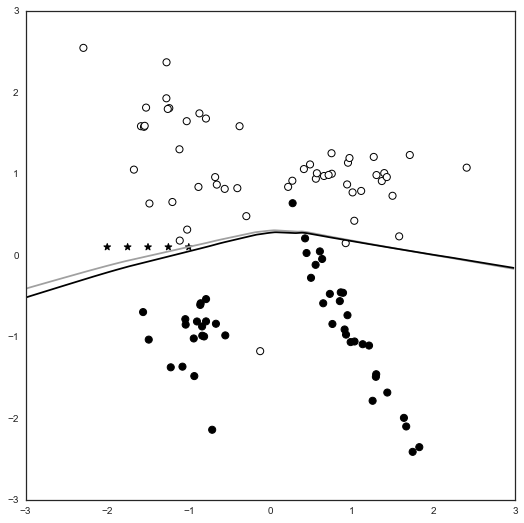

In [9]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## После 3-кратной частичной подгонки

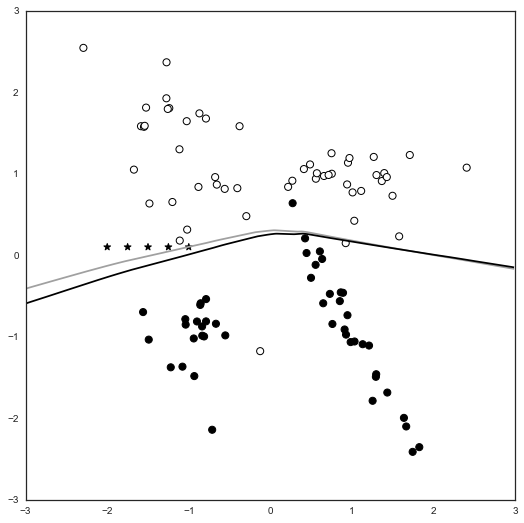

In [10]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## После 4-кратной частичной подгонки

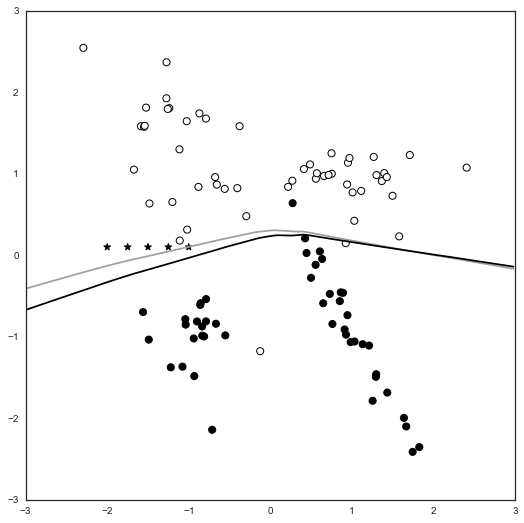

In [11]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

## После 5-кратной частичной подгонки

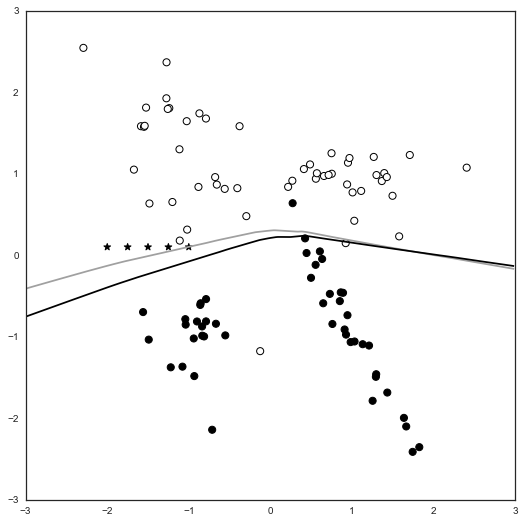

In [12]:
clf.partial_fit(chaff_X, chaff_y)
probs_poisoned = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plot_decision_boundary(X, y, probs, chaff_X, chaff_y, probs_poisoned)

Этот код используется для иллюстрации влияния атаки "данные-мусора" на модель машинного обучения. Давайте рассмотрим цель и результаты:

*Цель кода:*
- Показать, как добавление "данных-мусора" может повлиять на решающую границу модели машинного обучения.

*Результаты:*
1. *Исходный график:*
   - Первоначальная решающая граница модели строится на основе исходных данных.
   - Это демонстрирует, как модель разделяет классы до внедрения "данных-мусора".

2. *График после добавления "данных-мусора":*
   - Внедрение данных-мусора влияет на решающую границу модели.
   - Модель адаптируется к новым данным, что может привести к переобучению или изменению её поведения.

Этот код помогает иллюстрировать, как добавление даже небольшого количества некорректных данных может изменить поведение модели машинного обучения и её способность делать верные прогнозы.